# Versuch 223 Brownsche Bewegung - Auswertung
##### Felix Fleischle - 22.11.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import norm

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(",","."))
t,x,y = np.loadtxt("C:/Users/fexfl/Desktop/data/Messung.dat", skiprows = 1, usecols =(1,2,3), converters={1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True )

Text(0.5, 1.0, 'Brownian Motion')

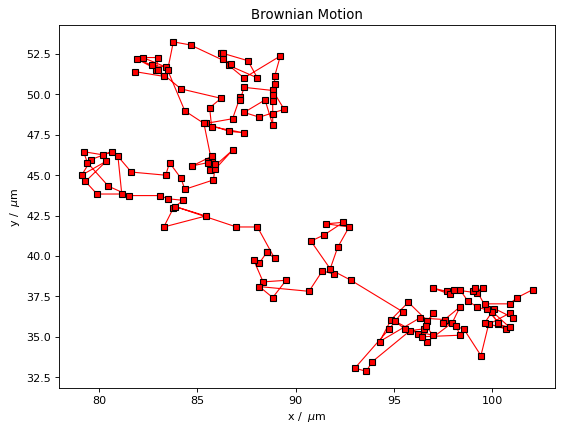

In [3]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(x, y, marker='s', color='red', linewidth=1, markeredgecolor="black")
plt.xlabel('x / '+' $\mu$'+'m')
plt.ylabel('y / '+' $\mu$'+'m')
plt.title('Brownian Motion')
#plt.savefig('figures/brown1.pdf', format='PDF')

In [4]:
dt=np.array([])
dx=np.array([])
dy=np.array([])
i=0

while i < len(t)-1:
    dt=np.append(dt,t[i+1]-t[i])
    dx=np.append(dx,x[i+1]-x[i])
    dy=np.append(dy,y[i+1]-y[i])
    i = i + 1
    
r_squared=dx**2+dy**2

In [5]:
r_squared_mean=np.mean(r_squared) * 10**-12
print("r_squared_mean= " ,r_squared_mean)
r_squared_mean_std=np.std(r_squared)/np.sqrt(len(r_squared)) * 10**-12
print("r_squared_mean_std= " ,r_squared_mean_std)
dt_mean=np.mean(dt)
print("dt_mean= ", dt_mean)

r_squared_mean=  1.7697191032258056e-12
r_squared_mean_std=  1.5387279956266915e-13
dt_mean=  1.000858064516129


In [6]:
# Messwerte für a,T und eta aus Diagramm
eta = 0.98 * 10**(-3) # Pa s
eta_err = 0.01 * 10**(-3)
a = 0.5 * 755 * 10**(-9) # m
a_err = 0.5 * 30 * 10**(-9)
T = 21.3 + 273.15 # K
T_err = 0.1 

k = 6 * np.pi * eta * a * r_squared_mean / (4 * T * dt_mean)

def errorFrac(x, x_err, p):
    return (x_err * p)/x

eta_errfrac = errorFrac(eta, eta_err, 1)
a_errfrac = errorFrac(a,a_err, 1)
T_errfrac = errorFrac(T,T_err, 1)
r_squared_mean_errfrac = errorFrac(r_squared_mean, r_squared_mean_std, 1)

print(eta_errfrac)
print(a_errfrac)
print(T_errfrac)
print(r_squared_mean_errfrac)

k_err = np.sqrt(eta_errfrac**2 + a_errfrac**2 + T_errfrac**2 + r_squared_mean_errfrac**2) * k

print("Boltzmann-Konstante:", k, "+-", k_err, "[J/K]")

0.010204081632653062
0.039735099337748346
0.0003396162336559688
0.08694758353582394
Boltzmann-Konstante: 1.046898194372693e-23 +- 1.0064933373080443e-24 [J/K]


In [7]:
#D = k * T / (6*np.pi*eta*a)
D = r_squared_mean / (4 * dt_mean)

k_errfrac = errorFrac(k,k_err,1)

#D_err = np.sqrt(k_errfrac**2 + T_errfrac**2 + eta_errfrac**2 + a_errfrac**2) * D
D_err = r_squared_mean_std / (4 * dt_mean)

print("Diffusionskonstante:", D, "+-", D_err, "[m^2/s]")

Diffusionskonstante: 4.4205046798553485e-13 +- 3.8435219992222356e-14 [m^2/s]


0.021609677419354854
0.940421487129433


Text(-4, 0.07, '$\\mu = 0.02 \\mu m$')

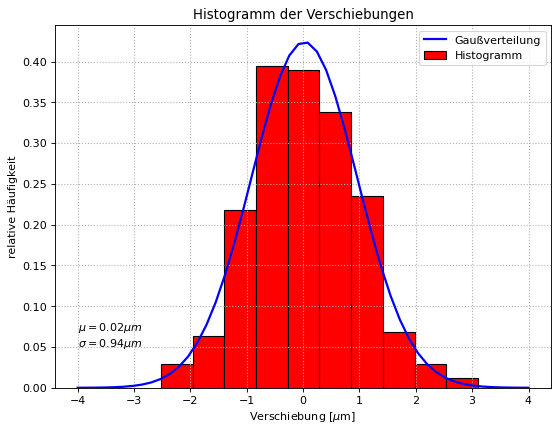

In [8]:
all_data = np.append(dx,dy)

mu = np.mean(all_data)
sigma = np.std(all_data)
gauss = norm.pdf(np.linspace(-4,4), mu, sigma)

print(mu)
print(sigma)

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(all_data, density=True, color="red", histtype="bar", label = "Histogramm", edgecolor="black")
plt.plot(np.linspace(-4,4), gauss,"b-" ,linewidth=2, label="Gaußverteilung")
plt.legend()
plt.title("Histogramm der Verschiebungen")
plt.grid(linestyle=":", linewidth=1)
plt.xlabel("Verschiebung [$\mu$m]")
plt.ylabel("relative Häufigkeit")
plt.text(-4, 0.05, "$\sigma = 0.94 \mu m$")
plt.text(-4, 0.07, "$\mu = 0.02 \mu m$")

Text(0.5, 1.0, 'Kummulative Verschiebung')

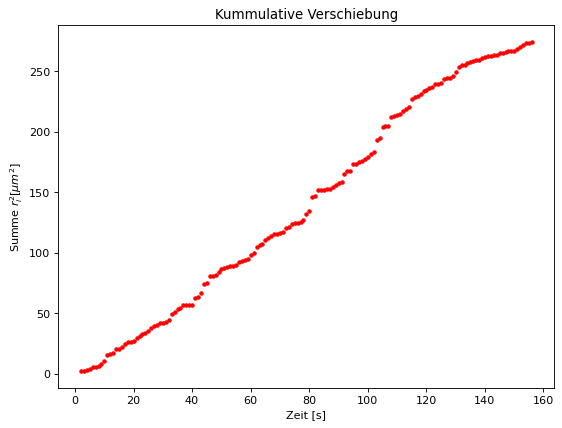

In [9]:
plt.figure(figsize=(8, 6), dpi=80)
r_kumm = np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker=".", color="red", linewidth=0)
plt.xlabel("Zeit [s]")
plt.ylabel("Summe $r_i^2 [\mu m^2]$")
plt.title("Kummulative Verschiebung")

Steigung: 1.950229949035652e-12 +- 1.3433602608827583e-14 [m^2/s]


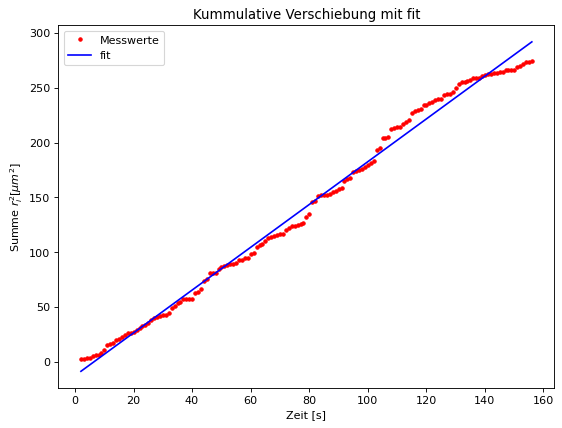

In [10]:
def linear(x,s,z):
    return s*x + z

popt, pcov = curve_fit(linear, t[:-1], r_kumm)

s = popt[0]
z = popt[1]
s_err = np.sqrt(pcov[0,0])
z_err = np.sqrt(pcov[1,1])

s_m = s * 10**-12
s_m_err = s_err * 10**-12
print("Steigung:", s_m, "+-", s_m_err, "[m^2/s]")

plt.figure(figsize=(8, 6), dpi=80)
r_kumm = np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker=".", color="red", linewidth=0, label="Messwerte")
plt.plot(t[:-1], linear(t[:-1], s, z), color="blue", label="fit")
plt.xlabel("Zeit [s]")
plt.ylabel("Summe $r_i^2 [\mu m^2]$")
plt.title("Kummulative Verschiebung mit fit")
plt.legend()

In [11]:
k_s = 6 * np.pi * eta * a * s_m / (4 * T)

s_m_errfrac = errorFrac(s_m, s_m_err, 1)

k_s_err = np.sqrt(eta_errfrac**2 + a_errfrac**2 + s_m_errfrac**2 + T_errfrac**2) * k_s

print("Boltzmannkonstante:", k_s, "+-", k_s_err, "[J/K]")

#D_s = k_s * T /(6 * np.pi * eta * a)
D_s = s_m / 4

k_s_errfrac = errorFrac(k_s, k_s_err, 1)

#D_s_err = np.sqrt(k_s_errfrac**2 + T_errfrac**2 + eta_errfrac**2 + a_errfrac**2 ) * D_s
D_s_err = s_m_err / 4

print("Diffusionskonstante:", D_s, "+-", D_s_err, "[m^2/s]")

Boltzmannkonstante: 1.1546714459783034e-23 +- 4.803439102876003e-25 [J/K]
Diffusionskonstante: 4.87557487258913e-13 +- 3.3584006522068958e-15 [m^2/s]
